## Slime Mould Optimization (SMO) algorithm

In [1]:
import numpy as np

class SlimeMould:
    def __init__(self, num_slime_moulds, num_iterations, decay_rate, step_size):
        self.num_slime_moulds = num_slime_moulds
        self.num_iterations = num_iterations
        self.decay_rate = decay_rate
        self.step_size = step_size
        
    def optimize(self, start_pos, end_pos, obstacle_map):
        height, width = obstacle_map.shape
        slime_moulds = np.zeros((self.num_slime_moulds, 2))
        slime_moulds[:, 0] = start_pos[0]
        slime_moulds[:, 1] = start_pos[1]
        pheromone_map = np.zeros((height, width))
        
        for i in range(self.num_iterations):
            for j in range(self.num_slime_moulds):
                x, y = slime_moulds[j, :]
                dx = np.random.uniform(-1, 1)
                dy = np.random.uniform(-1, 1)
                dx /= np.linalg.norm([dx, dy])
                dy /= np.linalg.norm([dx, dy])
                x += self.step_size * dx
                y += self.step_size * dy
                
                if x < 0 or x >= height or y < 0 or y >= width:
                    continue
                
                if obstacle_map[int(x), int(y)] == 1:
                    continue
                
                pheromone = pheromone_map[int(x), int(y)]
                prob = np.exp(-self.decay_rate * pheromone)
                if np.random.uniform() < prob:
                    slime_moulds[j, :] = [x, y]
                    
                    if np.linalg.norm([x - end_pos[0], y - end_pos[1]]) < 10:
                        return slime_moulds[j, :]
                
                pheromone_map[int(x), int(y)] += 1
        
        return None


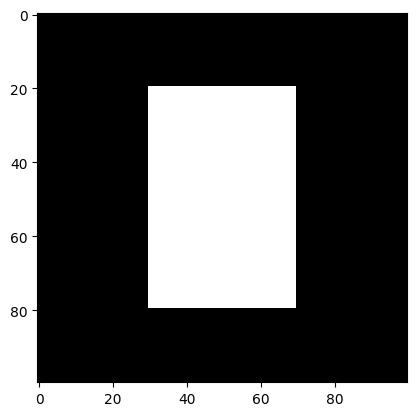

In [3]:
import matplotlib.pyplot as plt

# Create an obstacle map
obstacle_map = np.zeros((100, 100))
obstacle_map[20:80, 30:70] = 1

# Create a SlimeMould object
smo = SlimeMould(num_slime_moulds=100, num_iterations=100, decay_rate=0.1, step_size=2)

# Find the shortest path between two points
start_pos = [10, 10]
end_pos = [90, 90]
optimal_pos = smo.optimize(start_pos, end_pos, obstacle_map)

# Plot the results
plt.imshow(obstacle_map, cmap='gray')
if optimal_pos is not None:
    plt.plot([start_pos[1], optimal_pos[1]], [start_pos[0], optimal_pos[0]], 'r')
    plt.plot([optimal_pos[1], end_pos[1]], [optimal_pos[0], end_pos[0]], 'g')
plt.show()
